In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


Question: Can distinct patterns and similarities among authors in the Reuters C50 Corpus be recognized, based solely on the content of the articles they have written? Also, can the themes of these articles be determined after clustering all of the documents?

Approach: To solve the first question, I first needed to import some required libraries for the analysis. The nltk library was loaded in to assist in working with natural language data, and it also contains the data for the Reuters C50 Corpus. The pandas and sklearn libraries were imported in order to enable the machine learning techniques needed to study the question, and the matplotlib and seaborn libraries were imported to enable particular visualizations. After importing the necessary libraries, I downloaded the Reuters corpus data utilizing nltk.download(). Once this was completed, the data needed to be loaded in. The authors were extracted through the use of the .fileids() function, which gathers the file IDs of all the documents in the Reuters C50 corpus. The raw text was then loaded for each individual document utilizing the document IDs, which was stored in the docs list. After this, I decided to preprocess the data using TD-IDF vectorization. The TfidVectorizer() function converts the raw text into numerical features, considering both how important a word is to a document and how frequently it appears across all documents. Common English stop words were removed from the text, and the number of words was limited to the top 1000 words, based on TF-IDF scores. The fit_transform() function then applies the TF-IDF tranformation to all of the documents.

Once the preprocessing of the data was done, I elected to perform PCA in order to reduce the dimensionality of the data set. That way, the data is much more manageable and proper when it comes to visualization. The PCA() funciton calls on principle components analysis to reduce the data to just 2 dimensions. The fit-transform() function subsequently applies PCA to the TF-IDF matrix, in order to reduce it to two principal components. K-means clustering was then performed to cluster the documents based on their overall similarity. The KMeans() function calls on K-means clustering to create 5 clusters, and the fit_predict() function performs K-means clustering on the dimensionally reduced data, assigning each document to a specific cluster. Finally, the PCA-reduced data is plotted on a two-dimensional scatter plot using sns.scatterplot(). The points are colored based on the cluster they are a member of, and the x- and y-axes signify the two principal components resulting from PCA.

In [8]:
import nltk
from nltk.corpus import reuters
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\aschm\AppData\Roaming\nltk_data...


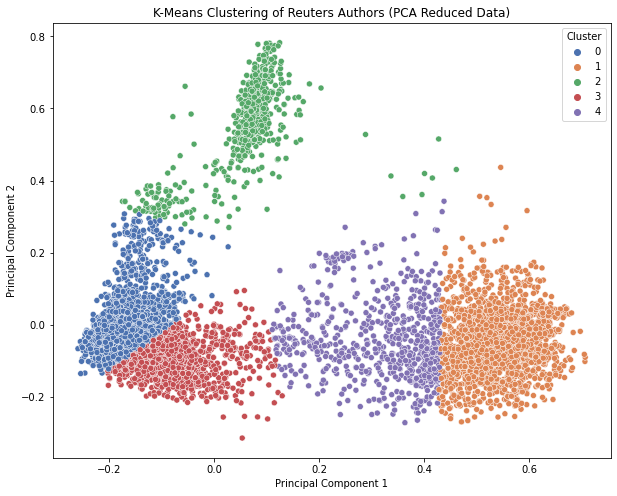

In [9]:
# Downloading the Reuters corpus
nltk.download('reuters')

# Loading the data 
authors = reuters.fileids()
docs = [reuters.raw(doc_id) for doc_id in authors]

# Preprocessing the text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(docs)

# Performing PCA to reduce dimensionality
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

# Applying K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_reduced)

# Visualizing the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=clusters, palette="deep")
plt.title("K-Means Clustering of Reuters Authors (PCA Reduced Data)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()


Results: From the above scatterplot, it can be observed that there are five distinct clusters, suggesting that the K-means clustering has successfully grouped the documents into clusters corresponding to the similarity of their overall content. That being said, clusters 0 and 3 and clusters 4 and 1 are almost right next to one another, indicating that the documents in these adjacet clusters possess patterns in the documents which are similar to one another. However, cluster 2 appears to be the most isolated from the rest of the other clusters. As such, it can be inferred that the documents in this cluster maintain different patterns realtive to those in the other four clusters. When looking at the density of each cluster, it seems that clusters 0 and 3 are very compact, suggesting that these groups of documents possess more consistent general themes. By contrast, cluster 2 is incredibly spread out. This implies that there is potentially more variation in the cluster with regards to overarching themes. However, to determine the exact themes pertaining to these clusters, further investigation is required.

Approach: To figure out if themes can be determined after clustering documents together, I first had to import the numpy library, such that operations like sorting arrays could be properly handled. After this was done, I defined a function to get the top keywords for each cluster, with the parameters data, clusters, labels, and n_terms (set to 10). The data parameter represents the TF-IDF matrix that numerically represents the document data, and the clusters parameter represents the cluster labels assigned to each individual document via K-means clustering. The labels parameter represents the list of words from the TF-IDF vectorizer, and the n-terms parameter indicates the number of top terms gathrered for each cluster, which is 10, in this case. The function first creates a DataFrame where each row relates to a cluster, and each column relates to the mean TF-IDF score for the top term across the entirety of the cluster's documents. Top keywords are extracted by iterating over the DataFrame, which are subsequently stored in a dictionary called top_keywords. This dictionary is returned by the get_top_keywords() function. The function is then applied to the TF-IDF data and the cluster labels. Cluster labels are retrieved by kmeans.labels_, and vectorizer.get_feature_names() retrieves the list of words from the TF-IDF vectorizer. The previously defined get_top_keywords() function is then called to obtain the top keywords for each cluster. These keywords are printed out onto the screen, in the hopes of identifying potential themes among the clusters.

In [11]:
import numpy as np

# Getting the top terms for each cluster
def get_top_keywords(data, clusters, labels, n_terms=10):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    top_keywords = {}
    
    for i, row in df.iterrows():
        top_keywords[i] = [labels[j] for j in np.argsort(row)[-n_terms:]]
    
    return top_keywords

# Applying the function to TF-IDF data and cluster labels
cluster_labels = kmeans.labels_
terms = vectorizer.get_feature_names()
top_keywords_per_cluster = get_top_keywords(X, cluster_labels, terms, n_terms=10)

# Displaying the top keywords for each cluster (potential themes)
for cluster_num, keywords in top_keywords_per_cluster.items():
    print(f"Cluster {cluster_num}: {', '.join(keywords)}")

Cluster 0: trade, stock, oil, dlrs, bank, shares, company, lt, pct, said
Cluster 1: qtr, profit, revs, shr, loss, mln, net, cts, 000, vs
Cluster 2: sets, dividend, vs, prior, april, pay, record, qtly, div, cts
Cluster 3: stg, pct, tonnes, 1986, 000, year, billion, said, dlrs, mln
Cluster 4: 000, qtr, billion, dlrs, shr, loss, cts, net, mln, vs


Results: From the keywords above, it does seem as if certain themes for each cluster can been interpreted. For the first cluster (cluster 0), the top keywords appear to be trade, stock, oil, dlrs, bank, and shares. This indicates that the theme of the cluster of documents relates to the stock market and trade. In the second cluster (cluster 1), the top keywords from its documents are qtr, profit, revs, shr, loss, and mln. This suggests that the theme of cluster 1 might center around financial reports and company earnings. For the third cluster (cluster 2), the top keywords derived were sets, dividend, vs, prior, april, and pay. This alludes to a theme focusing on dividends and financial payouts or transactions. In the fourth cluster (cluster 3), the top keywords seem to be stg, pct, tonnes, 1986, 000, and year. This indicates a potential theme of the commodities market and currency, since words like tonnes are often used to describe the volume of silver or gold. Lastly, in the fifth cluster (cluster 4), the top keywords are 000, qtr, billion, dlrs, shr, and loss. As was the case with the second cluster (cluster 1), this cluster possesses an overarching theme of financial reports. Therefore, additional keywords may be needed in order to properly distinguish between the themes of these two clusters. Despite identifying five seprate themes among the clusters, it appears that all of the clusters concentrate on finance, business, and trade, at least to some degree. As such, further analysis might be required to extract more specific underlying themes than what were found.

Conclusion: Through the general application of both PCA and K-Means clustering with regards to the Reuters C50 Corpus, distinct clusters of writing styles and commonalities among different authors can be recognized just from the documents they have written. These clusters effectively offer some insights as to how authors might approach writing on similar topics (like finance, business, and trade), as was seen in each of the documents in the corpus. That being said, because the clustering was performed on the basis of documents rather than authors, insights reagrding the specific authors which comprise each cluster cannot be determined through this analysis. Regardless, researchers and business scholars can utilize this analyis to observe the similarities in writing styles among business writers of the past, gaining valuable information relating to what was written about before their time. In addition, the overall themes of these generated writing style clusters can be feasibly determined. This is done through examining the most significant keywords encased within each cluster. These keywords offer an indirect overview of the most crucial topics addressed within the cluster, allowing for the ability to extract overarching themes. Researchers and business scholars can therefore utilize this analysis to gain significant insights as to the topics frequently written about in the past, offering them the chance to compare and contrast these topics with what is written about in the modern day.